# Summarizing Privacy Policy - Data Wrangling

## Contents

* [Introduction](#Introduction)
* [Objectives](#Objectives)
* [About the dataset](#About_the_dataset)
* [Import Tools](#Import_Tools)
* [Creating a Dataframe](#Creating_a_Dataframe)
* [Inspecting and Cleaning](#Inspection_and_cleaning)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Summary](#Summary)
* [References](#References)

## Introduction<a id='Introduction'></a>

In this notebook, I will focus on collecting data, organizing it, and making sure it's well defined. 
Attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, 
but try not to be overzealous in cleaning before we've explored the data to better understand it.

## Objectives<a id='Objectives'></a>

*[Contents](#Contents)

In this project I am going to create an algorithm to summarize text, in particular the terms of service privacy policy. 
There are several methods this can be accomplished and results tested for, I plan to use a few.

## About the dataset<a id='About_the_dataset'></a>

*[Contents](#Contents)

421 pairs of (agreement text, summary) from data privacy policies

From https://aclanthology.org/W19-2201/
Abstract
Unilateral legal contracts, such as terms of service, play a substantial role in modern digital life. However, few read these documents before accepting the terms within, as they are too long and the language too complicated. We propose the task of summarizing such legal documents in plain English, which would enable users to have a better understanding of the terms they are accepting. We propose an initial dataset of legal text snippets paired with summaries written in plain English. We verify the quality of these summaries manually, and show that they involve heavy abstraction, compression, and simplification. Initial experiments show that unsupervised extractive summarization methods do not perform well on this task due to the level of abstraction and style differences. We conclude with a call for resource and technique development for simplification and style transfer for legal language.

The project was based on the articles and datasets.

https://github.com/maastrichtlawtech/awesome-legal-nlp

https://aclanthology.org/W19-2201/

https://github.com/lauramanor/legal_summarization/tree/master

## Import Tools<a id='Import_Tools'></a>

*[Contents](#Contents)

In [2]:
import json
import pandas as pd
import os
from dotenv import load_dotenv

## Creating a Dataframe<a id='Creating_a_Dataframe'></a>

*[Contents](#Contents)

In [3]:
# Load environment variables from the .env file
load_dotenv()

# Get file path from environment variable
file_path = os.getenv("FILE_PATH")

# Load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract relevant data into a dataframe
records = []
for item in data.values():
    records.append({
        'legal_text': item.get('original_text', ''),
        'summary': item.get('reference_summary', '')
    })

# Convert to DataFrame
df = pd.DataFrame(records)

# Inspect the DataFrame
print(df.head())


                                          legal_text  \
0  search encrypt does not track search history i...   
1  we also provide you additional data control op...   
2  rvices you grant oath the following worldwide ...   
3  we may change these terms and conditions to re...   
4  it also enables us to serve you advertising an...   

                                             summary  
0                   this service does not track you.  
1  you can request access and deletion of persona...  
2  the copyright license granted to yahoo for pho...  
3  if you are a subscriber jagex will treat the f...  
4  the service uses your personal data to employ ...  


## Inspection and cleaning<a id='Inspection_and_cleaning'></a>

*[Contents](#Contents)

In [4]:
# Get basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   legal_text  361 non-null    object
 1   summary     361 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB
None


In [5]:
# Check for any missing values
print(df.isnull().sum())

legal_text    0
summary       0
dtype: int64


In [6]:
# Sample some rows to understand data layout
print(df.sample(5))

                                            legal_text  \
25   contests surveys and sweepstakes data this per...   
208  the ifttt service is not intended for use by c...   
309  netflix may from time to time change these ter...   
32   we also save searches but again not in a perso...   
267  modifications to service discogs reserves the ...   

                                               summary  
25   spotify may merge your current personal info w...  
208  ifttt is not meant to be used by users who are...  
309  they can change the terms of service any time ...  
32                    this service does not track you.  
267  the service can not only be discontinued but a...  


## Exploratory Data Analysis<a id='Exploratory_Data_Analysis'></a>

*[Contents](#Contents)

In [10]:
print(df.columns)

Index(['legal_text', 'summary'], dtype='object')


       legal_text_length  summary_length
count         361.000000      361.000000
mean           71.548476       15.019391
std            82.973011       10.226717
min             7.000000        3.000000
25%            29.000000        9.000000
50%            50.000000       13.000000
75%            83.000000       17.000000
max           783.000000       80.000000


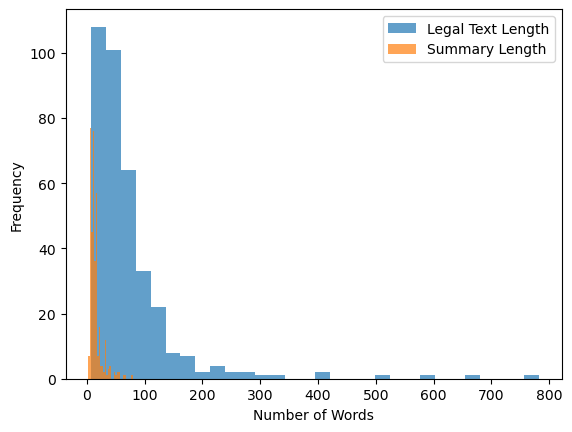

In [13]:
# Text Length Analysis
# Calculate length of each legal text and summary
df['legal_text_length'] = df['legal_text'].apply(lambda x: len(x.split()))
df['summary_length'] = df['summary'].apply(lambda x: len(x.split()))

# Basic statistics on length
print(df[['legal_text_length', 'summary_length']].describe())

# Plot histograms for length distributions
import matplotlib.pyplot as plt

plt.hist(df['legal_text_length'], bins=30, alpha=0.7, label='Legal Text Length')
plt.hist(df['summary_length'], bins=30, alpha=0.7, label='Summary Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 300.2/300.2 kB 9.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


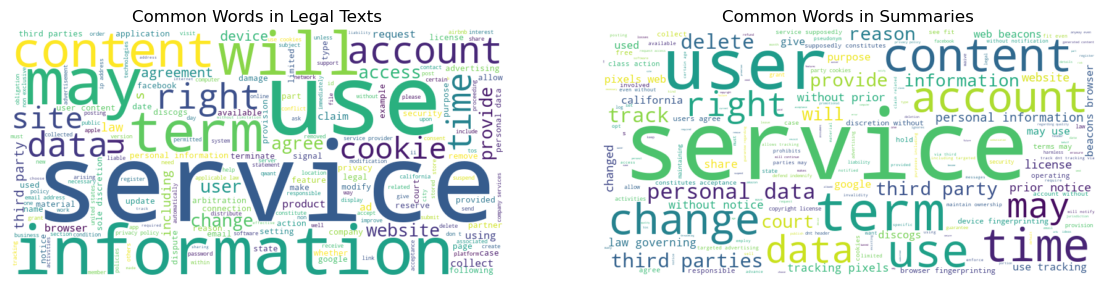

In [15]:
# Keyword Analysis
!pip install wordcloud
from collections import Counter
from wordcloud import WordCloud

# Combine all legal texts and summaries
all_legal_text = ' '.join(df['legal_text'].tolist())
all_summaries = ' '.join(df['summary'].tolist())

# Generate and plot word cloud
wordcloud_legal = WordCloud(width=800, height=400, background_color='white').generate(all_legal_text)
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(all_summaries)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_legal, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Legal Texts')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Summaries')

plt.show()


count    361.000000
mean       0.339217
std        0.237991
min        0.003831
25%        0.149123
50%        0.272727
75%        0.458333
max        1.000000
Name: summary_ratio, dtype: float64


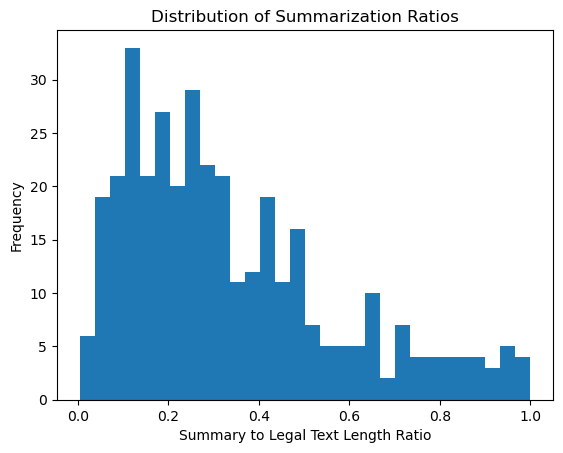

In [16]:
# Summary Length Ratio
df['summary_ratio'] = df['summary_length'] / df['legal_text_length']
print(df['summary_ratio'].describe())

# Plot the ratio distribution
plt.hist(df['summary_ratio'], bins=30)
plt.xlabel('Summary to Legal Text Length Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Summarization Ratios')
plt.show()


## Summary<a id='Summary'></a>

*[Contents](#Contents)

The summarized text is significantly smaller than the legal text. My hope is that the algorithm will provide 
a similar size reduction while maintaining accuracy. There are a few standardized methods to confirm summarization 
accuracy with natural language processing tools. I may re-organize the dataframe to provice more features or identifiers but we will see when we start preprocessing.

## References<a id='References'></a>

*[Contents](#Contents)

https://github.com/maastrichtlawtech/awesome-legal-nlp

https://aclanthology.org/W19-2201/

https://github.com/lauramanor/legal_summarization/tree/master